kmeans
('Acuuracy=', 0.24)
('confusion matrix=', array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]]))
gmm
('Acuuracy=', 0.0)
('confusion matrix=', array([[ 0, 34, 16],
       [50,  0,  0],
       [50,  0,  0]]))


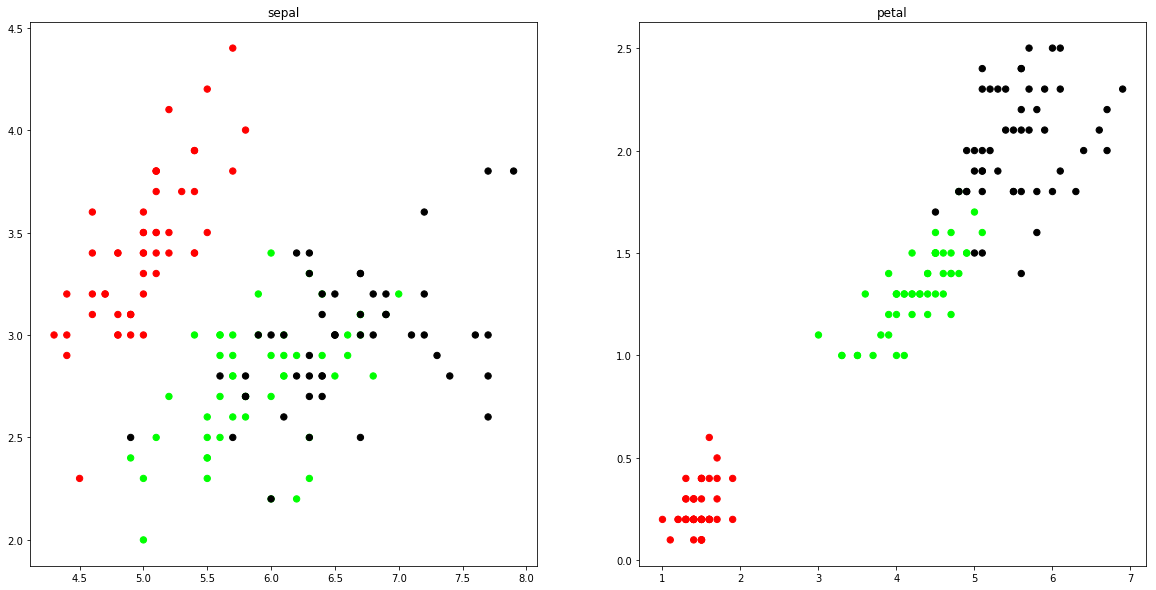

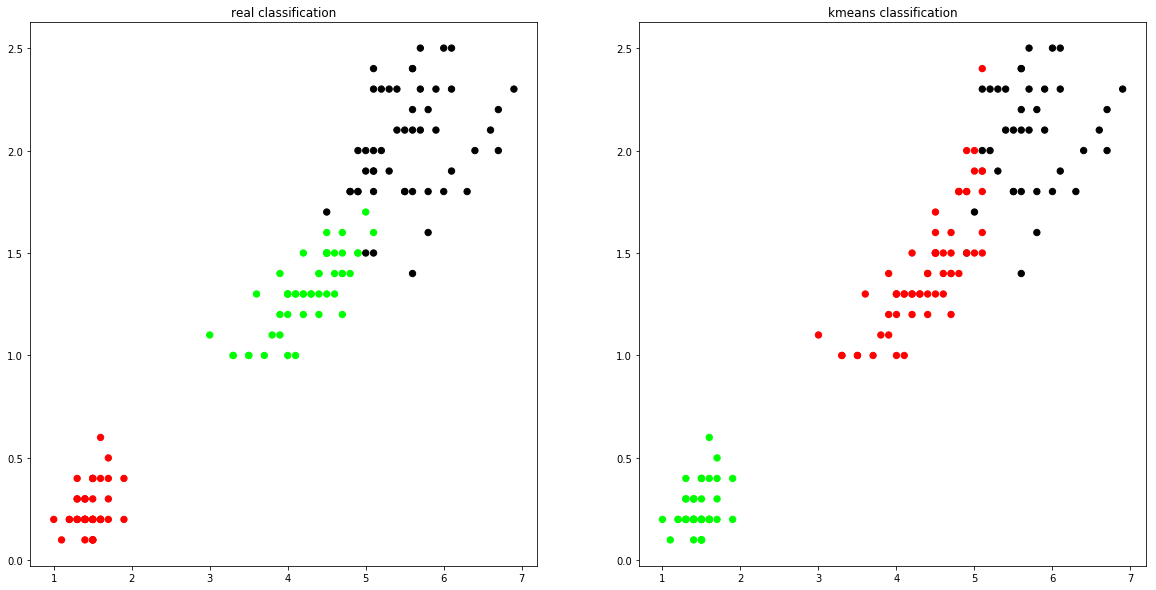

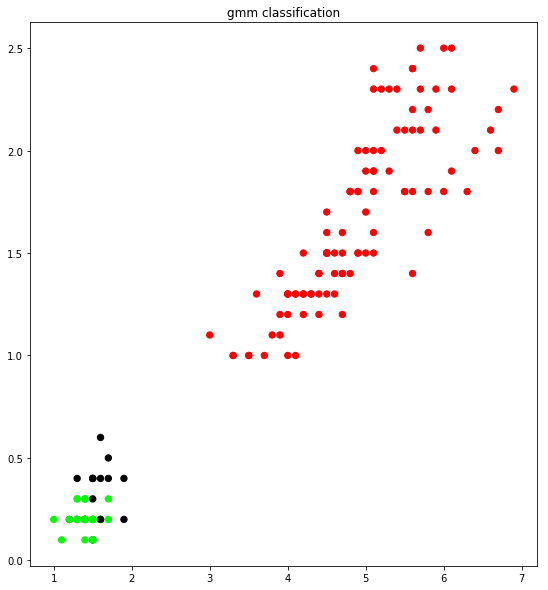

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

%matplotlib inline
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['sepal_width','sepal_length','petal_width','petal_length']
y=pd.DataFrame(iris.target)
y.columns=['target']

plt.figure(figsize=(20,10))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(x.sepal_width,x.sepal_length,c=colormap[y.target],s=40)
plt.title('sepal')
plt.subplot(1,2,2)
plt.scatter(x.petal_width,x.petal_length,c=colormap[y.target],s=40)
plt.title('petal')
model=KMeans(n_clusters=3)
model.fit(x)
ypred=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.figure(figsize=(20,10))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(x.petal_width,x.petal_length,c=colormap[y.target],s=40)
plt.title('real classification')
plt.subplot(1,2,2)
plt.scatter(x.petal_width,x.petal_length,c=colormap[ypred],s=40)
plt.title('kmeans classification')
print("kmeans")
print("Acuuracy=",sm.accuracy_score(y,model.labels_))
print("confusion matrix=",sm.confusion_matrix(y,model.labels_))
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x)
xas=scaler.transform(x)
xs=pd.DataFrame(xas,columns=x.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm=gmm.predict(xs)
plt.figure(figsize=(20,10))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(x.petal_width,x.petal_length,c=colormap[y_gmm],s=40)
plt.title('gmm classification')
print("gmm")
print("Acuuracy=",sm.accuracy_score(y,y_gmm))
print("confusion matrix=",sm.confusion_matrix(y,y_gmm))